In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_curve, auc, f1_score, precision_score, confusion_matrix
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

In [2]:
# loading the data from csv file to a Pandas DataFrame
parkinsons_data = pd.read_csv('/content/parkinsons.csv')

In [3]:
# printing the first 5 rows of the dataframe
parkinsons_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
# number of rows and columns in the dataframe
parkinsons_data.shape

(195, 24)

In [5]:
# checking for missing values in each column
parkinsons_data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [6]:
# getting some statistical measures about the data
parkinsons_data.describe()


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [7]:
# distribution of target Variable
parkinsons_data['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

In [8]:
X = parkinsons_data.drop(columns=['name','status'], axis=1)
Y = parkinsons_data['status']

In [9]:
print(X)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [11]:
print(X.shape, X_train.shape, X_test.shape)

(195, 22) (156, 22) (39, 22)


DATA STANDARDIZATION

In [12]:
scaler = StandardScaler()

In [13]:
scaler.fit(X_train)

StandardScaler()

In [14]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
print(X_train)

[[ 0.63239631 -0.02731081 -0.87985049 ... -0.97586547 -0.55160318
   0.07769494]
 [-1.05512719 -0.83337041 -0.9284778  ...  0.3981808  -0.61014073
   0.39291782]
 [ 0.02996187 -0.29531068 -1.12211107 ... -0.43937044 -0.62849605
  -0.50948408]
 ...
 [-0.9096785  -0.6637302  -0.160638   ...  1.22001022 -0.47404629
  -0.2159482 ]
 [-0.35977689  0.19731822 -0.79063679 ... -0.17896029 -0.47272835
   0.28181221]
 [ 1.01957066  0.19922317 -0.61914972 ... -0.716232    1.23632066
  -0.05829386]]


XGBOOST

In [16]:
model1 = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)

In [17]:
model1.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [18]:
# accuracy score on training data using XGBclassifier
x_train_prediction = model1.predict(X_train)
Training_data_accuracy = accuracy_score(Y_train, x_train_prediction)
print('Accuracy score of training data : ', Training_data_accuracy)

Accuracy score of training data :  1.0


In [19]:
# accuracy score on training data XGBBoost
x_test_prediction = model1.predict(X_test)
Test_data_accuracy_xgb = accuracy_score(Y_test, x_test_prediction)
print('Accuracy score of test data : ', Test_data_accuracy_xgb)

Accuracy score of test data :  0.8717948717948718


In [20]:
Y_pred = model1.predict(X_test)

In [21]:
precision = precision_score(Y_test, Y_pred, average='weighted')
print("Precision:",precision)

Precision: 0.8786324786324786


In [22]:
f1 = f1_score(Y_test, Y_pred)
print("F1 score:",f1)

F1 score: 0.9180327868852459


In [23]:
#ROC Curve for XGBoost
from sklearn.metrics import roc_curve
Y_prob = model1.predict_proba(X_test)
Y_prob[:10]

array([[0.00293547, 0.99706453],
       [0.00205177, 0.9979482 ],
       [0.00335437, 0.9966456 ],
       [0.03679478, 0.9632052 ],
       [0.9890831 , 0.01091689],
       [0.44739056, 0.55260944],
       [0.9764613 , 0.02353871],
       [0.002873  , 0.997127  ],
       [0.00442022, 0.9955798 ],
       [0.00335413, 0.99664587]], dtype=float32)

In [24]:
Y_prob_positive = Y_prob[:,1]
Y_prob_positive

array([0.99706453, 0.9979482 , 0.9966456 , 0.9632052 , 0.01091689,
       0.55260944, 0.02353871, 0.997127  , 0.9955798 , 0.99664587,
       0.5721429 , 0.5488059 , 0.96172106, 0.9976672 , 0.63327444,
       0.43865994, 0.8768823 , 0.97413594, 0.79991484, 0.9981887 ,
       0.94037545, 0.95535606, 0.7471959 , 0.30688214, 0.00829079,
       0.9652874 , 0.11396237, 0.95205975, 0.9979482 , 0.23920256,
       0.98960006, 0.9815528 , 0.99623674, 0.8947066 , 0.99283916,
       0.30558836, 0.00906628, 0.98600256, 0.99269027], dtype=float32)

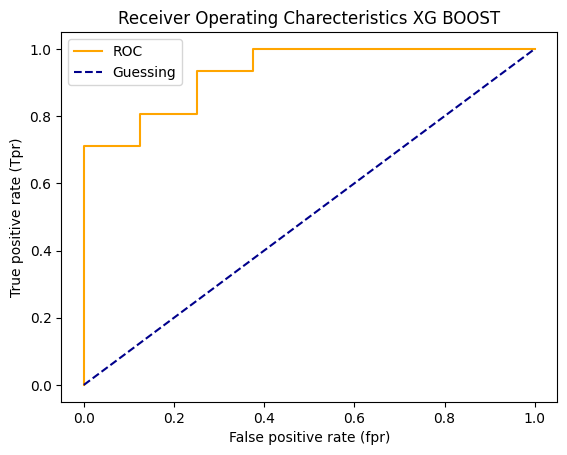

In [25]:
fpr,tpr,threshold = roc_curve(Y_test,Y_prob_positive)
#create a function for plotting roc curve

def plot_roc_curve(fpr,tpr):
  #plot roc curve
  plt.plot(fpr,tpr,color="orange",label= "ROC")
  #plot line with no predictive power
  plt.plot([0,1],[0,1],color="darkblue" , linestyle = "--",label="Guessing")

  #customize the plot
  plt.xlabel("False positive rate (fpr)")
  plt.ylabel("True positive rate (Tpr)")
  plt.title("Receiver Operating Charecteristics XG BOOST")
  plt.legend()
  plt.show()

plot_roc_curve(fpr,tpr)

In [26]:
#auc score
from sklearn.metrics import roc_auc_score

roc_auc_score(Y_test,Y_prob_positive)

0.9314516129032258

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
#for XGBoost
cf_matrix = confusion_matrix(Y_test,x_test_prediction)
print (cf_matrix)

[[ 6  2]
 [ 3 28]]


In [29]:
tn,fp,fn,tp = cf_matrix.ravel()

print(tn,fp,fn,tp)
print("True Negatives:", tn)
print("False Positives:", fp)
print("False Negatives:", fn)
print("True Positives:", tp)

6 2 3 28
True Negatives: 6
False Positives: 2
False Negatives: 3
True Positives: 28


<Axes: title={'center': 'Confusion Matrix - XG BOOST'}>

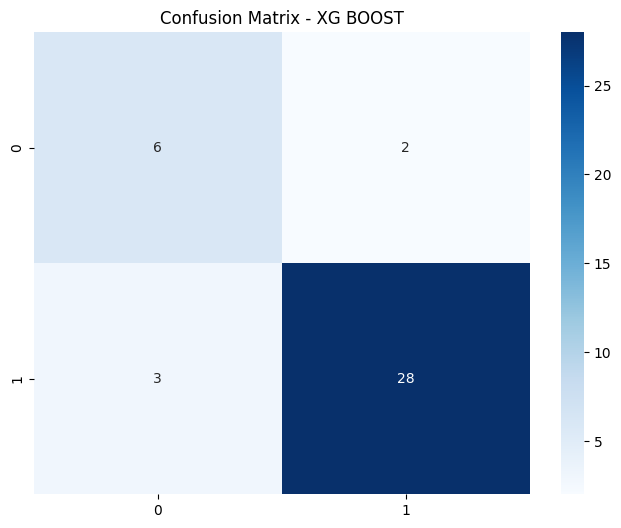

In [30]:
import seaborn as sns
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix - XG BOOST')
plt.xlabel('Predicted labels')
sns.heatmap(cf_matrix, annot=True, cmap='Blues')

RANDOM FOREST CLASSIFIER


In [31]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=2)
rf_classifier.fit(X_train, Y_train)


RandomForestClassifier(random_state=2)

In [32]:
# Predictions
Y_pred_rf = rf_classifier.predict(X_test)

# Accuracy
accuracy_rf = accuracy_score(Y_test, Y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

Random Forest Accuracy: 0.8205128205128205


In [33]:
f1_rf = f1_score(Y_test, Y_pred_rf)
print("F1 Score:", f1_rf)

# Precision
precision_rf = precision_score(Y_test, Y_pred_rf)
print("Precision:", precision_rf)

# Confusion Matrix
conf_matrix_rf = confusion_matrix(Y_test, Y_pred_rf)
print("Confusion Matrix:\n", conf_matrix_rf)


F1 Score: 0.8852459016393444
Precision: 0.9
Confusion Matrix:
 [[ 5  3]
 [ 4 27]]


In [34]:
auc_value = roc_auc_score(Y_test, Y_pred_rf)
print("AUC value:", auc_value)

AUC value: 0.747983870967742


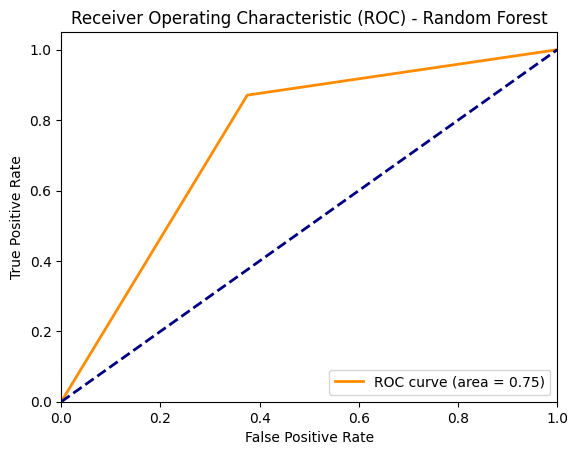

In [35]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_rf)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Random Forest')
plt.legend(loc="lower right")
plt.show()

<Axes: title={'center': 'Confusion Matrix - Random Forest'}>

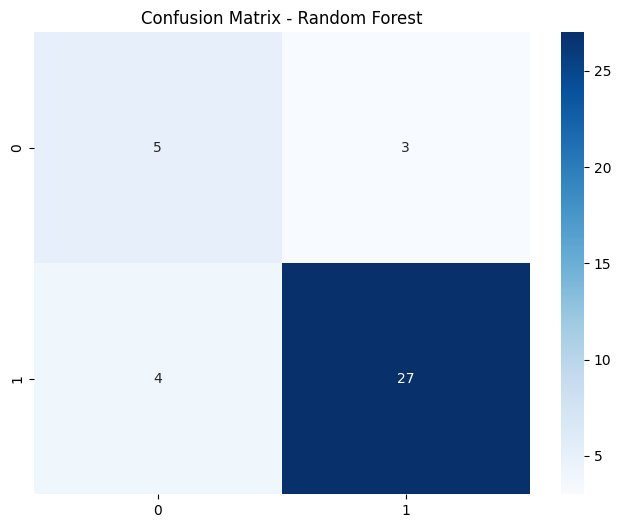

In [36]:
import seaborn as sns
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted labels')
sns.heatmap(conf_matrix_rf, annot=True, cmap='Blues')


GRADIENT BOOST

In [37]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=2)
clf.fit(X_train,Y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=2)

In [38]:
YGRADIENT_test_prediction = clf.predict(X_test)


In [39]:
test_datas_accuracyGRADIENT = accuracy_score(Y_test, YGRADIENT_test_prediction)
print('Accuracy score of test data : ', test_datas_accuracyGRADIENT)

Accuracy score of test data :  0.7948717948717948


In [40]:
precision_GRADIENT = precision_score(Y_test,YGRADIENT_test_prediction)
print("Precision:", precision_GRADIENT)

Precision: 0.9259259259259259


In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
#for Gradient Boosting
cfGRADIENT_matrix = confusion_matrix(Y_test,YGRADIENT_test_prediction)
print (cfGRADIENT_matrix)

[[ 6  2]
 [ 6 25]]


In [43]:
tn,fp,fn,tp = cfGRADIENT_matrix.ravel()

print(tn,fp,fn,tp)
print("True Negatives:", tn)
print("False Positives:", fp)
print("False Negatives:", fn)
print("True Positives:", tp)


6 2 6 25
True Negatives: 6
False Positives: 2
False Negatives: 6
True Positives: 25


<Axes: title={'center': 'Confusion Matrix - GRADIENT BOOST'}>

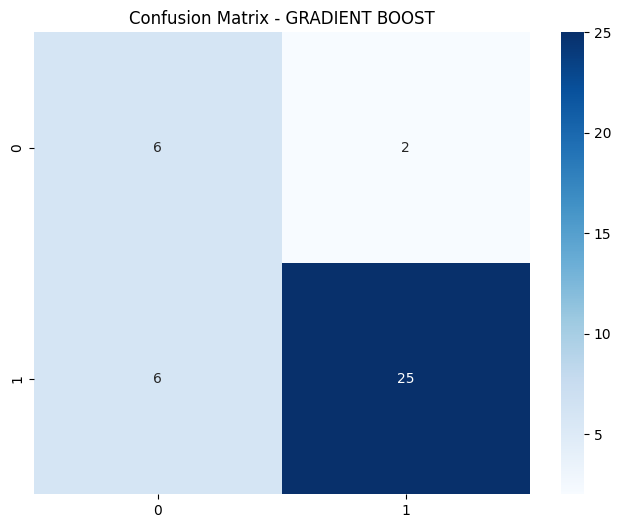

In [44]:
import seaborn as sns
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix - GRADIENT BOOST')
plt.xlabel('Predicted labels')
sns.heatmap(cfGRADIENT_matrix, annot=True, cmap='Blues')

In [45]:
auc_value1 = roc_auc_score(Y_test, YGRADIENT_test_prediction)
print("AUC value:", auc_value1)

AUC value: 0.7782258064516129


In [46]:
f1_GRADIENT = f1_score(Y_test, YGRADIENT_test_prediction)
print("F1 Score:", f1_GRADIENT)


F1 Score: 0.8620689655172414


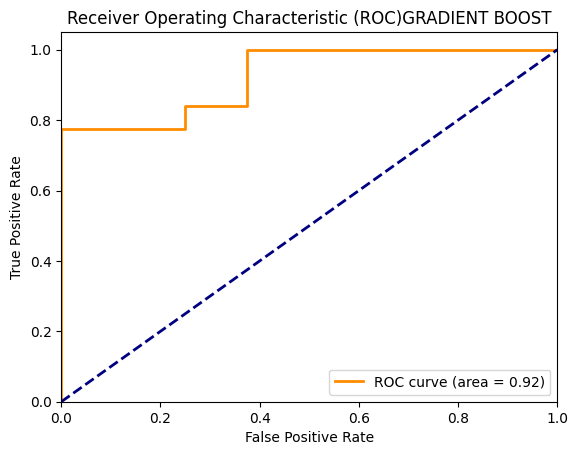

In [47]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming clf is your GradientBoostingClassifier model already fitted and X_test, Y_test are your test data

# Predict probabilities
YGRADIENT_test_probs = clf.predict_proba(X_test)[:,1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(Y_test, YGRADIENT_test_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)GRADIENT BOOST')
plt.legend(loc="lower right")
plt.show()


SVM


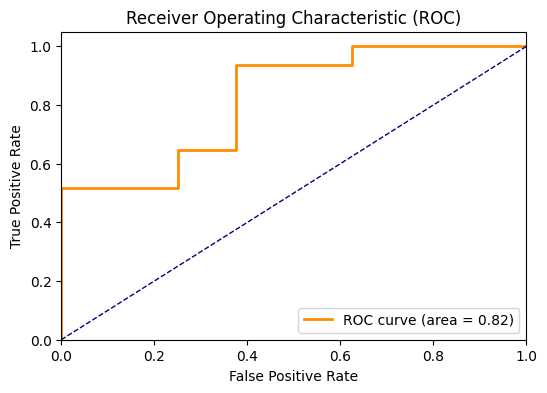

Accuracy on Training Data: 0.8846153846153846
Accuracy on Test Data: 0.8717948717948718
Precision: 0.90625
Recall: 0.9354838709677419
F1 Score: 0.9206349206349206


In [57]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Load data
parkinsons_data = pd.read_csv('/content/parkinsons.csv')

# Preprocessing
X = parkinsons_data.drop(columns=['name', 'status'], axis=1)
Y = parkinsons_data['status']

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Standardize features
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Build and train the SVM model
model = svm.SVC(kernel='linear')
model.fit(X_train, Y_train)

# Predictions
Y_train_pred_svm = model.predict(X_train)
Y_test_pred_svm = model.predict(X_test)

# Accuracy
train_accuracy_svm = accuracy_score(Y_train, Y_train_pred_svm)
test_accuracy_svm = accuracy_score(Y_test, Y_test_pred_svm)

# Precision, Recall, F1-score
precision_svm = precision_score(Y_test, Y_test_pred_svm)
recall_svm = recall_score(Y_test, Y_test_pred_svm)
f1_svm = f1_score(Y_test, Y_test_pred_svm)

# ROC Curve and AUC
Y_test_probs = model.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(Y_test, Y_test_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

print("Accuracy on Training Data:", train_accuracy_svm)
print("Accuracy on Test Data:", test_accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1 Score:", f1_svm)


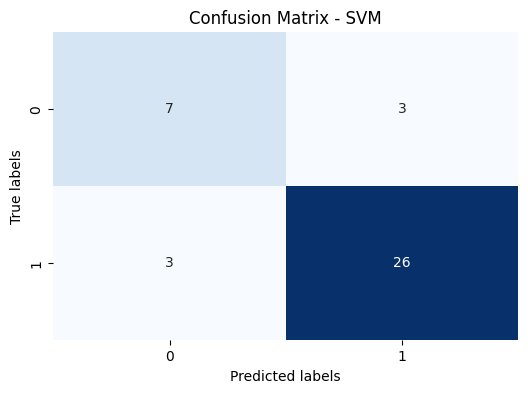

In [56]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion Matrix
cm = confusion_matrix(Y_test, Y_test_pred_svm)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - SVM')
plt.show()
